<a href="https://colab.research.google.com/github/ViktorLaurens/Notebooks/blob/main/NN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This is a notebook for a simple project in which we will train a neural network to recognize digits.

Let's start by importing everything we need.

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import mnist

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

Let's look at the data.

Shape of X_train: (60000, 28, 28)
Shape of y_train: (60000,)
Shape of X_test: (10000, 28, 28)
Shape of y_test: (10000,)

First example in X_train:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 

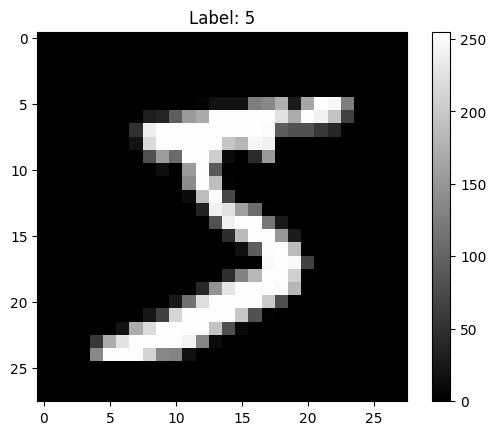


Corresponding label in Y_train:
5

First example in X_test:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  84 185 159 151  60  36   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [ 

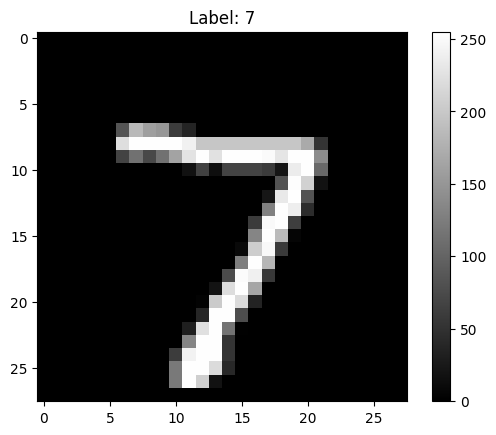


Corresponding label in Y_test:
7

Unique labels in y_train: [0 1 2 3 4 5 6 7 8 9]
Unique labels in y_test: [0 1 2 3 4 5 6 7 8 9]

Checking for NaN or infinity in X_train: False False
Checking for NaN or infinity in Y_train: False False
Checking for NaN or infinity in X_test: False False
Checking for NaN or infinity in Y_test: False False


In [12]:
# Check shapes of the datasets
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", Y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", Y_test.shape)

print("\nFirst example in X_train:")
print(X_train[0])  # View the first example (flattened or unflattened)

# Visualize the first example in X_train
print("\nVisualizing the first example in X_train:")
plt.imshow(X_train[0], cmap='gray')  # Display the image in grayscale
plt.title(f"Label: {Y_train[0]}")  # Display the corresponding label as title
plt.colorbar()  # Optional: add a colorbar
plt.show()

print("\nCorresponding label in Y_train:")
print(Y_train[0])  # View the label for the first example

print("\nFirst example in X_test:")
print(X_test[0])  # View the first test example

# Visualize the first example in X_test
print("\nVisualizing the first example in X_test:")
plt.imshow(X_test[0], cmap='gray')  # Display the image in grayscale
plt.title(f"Label: {Y_test[0]}")  # Display the corresponding label as title
plt.colorbar()  # Optional: add a colorbar
plt.show()

print("\nCorresponding label in Y_test:")
print(Y_test[0])  # View the label for the first test example

# Verify unique labels in the dataset
print("\nUnique labels in y_train:", np.unique(Y_train))
print("Unique labels in y_test:", np.unique(Y_test))

# Check if there are NaN or infinity values in the datasets
print("\nChecking for NaN or infinity in X_train:", np.isnan(X_train).any(), np.isinf(X_train).any())
print("Checking for NaN or infinity in Y_train:", np.isnan(Y_train).any(), np.isinf(Y_train).any())
print("Checking for NaN or infinity in X_test:", np.isnan(X_test).any(), np.isinf(X_test).any())
print("Checking for NaN or infinity in Y_test:", np.isnan(Y_test).any(), np.isinf(Y_test).any())

Normalize data.

In [13]:
# Normalize data
X_train = X_train / 255.
X_test = X_test / 255.

# print("\nFirst example in X_train:")
# print(X_train[0])  # View the first example (flattened or unflattened)

At this stage the data x_train and x_test is multi-dimensional which requires the use of CNN's. Instead we can flatten the data as we will do here but then spatial data between the features is lost. Now shape is (..., 28, 28) and we go to (..., 784).

In [14]:
# Flatten
X_train = X_train.reshape(60000,784)
X_test = X_test.reshape(10000,784)

# print("\nFirst example in X_train:")
# print(X_train[0])  # View the first example (flattened or unflattened)

# print("\nX_train:")
# print(X_train)  # View the first example (flattened or unflattened)

Transpose.

In [15]:
X_train = X_train.T
X_test = X_test.T

Y_train = Y_train.T
Y_test = Y_test.T

# Check shapes of the datasets
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", Y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", Y_test.shape)

# print("\nFirst example in X_train:")
# print(X_train[:, 0])  # View the first example (flattened or unflattened)

# print("\nX_train:")
# print(X_train)  # View the first example (flattened or unflattened)

Shape of X_train: (784, 60000)
Shape of y_train: (60000,)
Shape of X_test: (784, 10000)
Shape of y_test: (10000,)


Now we have our data in the right dimensions for a regular NN. Let's continue with initializing weigths and biases of NN.


In [23]:
def init_params():
  W1 = np.random.rand(10, 784) - 0.5 # Simple initialization
  # W1 = np.random.randn(10, 784) * np.sqrt(2. / 784) # He initialization (suitable for ReLU activation)
  b1 = np.random.rand(10, 1) - 0.5
  W2 = np.random.rand(10, 10) - 0.5 # Simple initialization
  # W2 = np.random.randn(10, 10) * np.sqrt(2. / 10) # He initialization (suitable for ReLU activation)
  b2 = np.random.rand(10, 1) - 0.5
  return W1, b1, W2, b2

def ReLU(Z):
  return np.maximum(0, Z)

# def softmax(Z):
#   return np.exp(Z)/ np.sum(np.exp(Z))

def softmax(logits):
    exp_logits = np.exp(logits - np.max(logits, axis=0, keepdims=True))  # Numerical stability improvement
    return exp_logits / np.sum(exp_logits, axis=0, keepdims=True)

def forward_prop(W1, b1, W2, b2, X):
  Z1 = W1 @ X + b1
  A1 = ReLU(Z1)
  Z2 = W2 @ A1 + b2
  A2 = softmax(Z2)
  return Z1, A1, Z2, A2

def one_hot(Y):
  one_hot_Y = np.zeros((Y.size, 10))
  one_hot_Y[np.arange(Y.size), Y] = 1
  return one_hot_Y.T

def deriv_ReLU(Z):
  return Z > 0

def back_prop(Z1, A1, Z2, A2, W2, X, Y):
  m = Y.size
  one_hot_Y = one_hot(Y)
  dZ2 = A2 - one_hot_Y
  dW2 = 1 / m * dZ2 @ A1.T
  db2 = 1 / m * np.sum(dZ2, axis=1, keepdims=True)
  dZ1 = W2.T @ dZ2 * deriv_ReLU(Z1)
  dW1 = 1 / m * dZ1 @ X.T
  db1 = 1 / m * np.sum(dZ1, axis=1, keepdims=True)
  return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
  W1 = W1 - alpha * dW1
  b1 = b1 - alpha * db1
  W2 = W2 - alpha * dW2
  b2 = b2 - alpha * db2
  return W1, b1, W2, b2

Let's test our functions.

In [24]:
W1, b1, W2, b2 = init_params()
print('W1: ', W1[:, 0], '\nb1: ', b1, '\nW2: ', W2[:, 0], '\nb2: ', b2)

Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X_train)
print('Z1: ', Z1[:, 0], '\nA1: ', A1[:, 0], '\nZ2: ', Z2[:, 0], '\nA2: ', A2[:, 0])

dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W2, X_train, Y_train)
print('dW1: ', dW1[:, 0], '\ndb1: ', db1, '\ndW2: ', dW2[:, 0], '\ndb2: ', db2)

W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, 0.1)
print('W1: ', W1[:, 0], '\nb1: ', b1, '\nW2: ', W2[:, 0], '\nb2: ', b2)

W1:  [-0.21415477 -0.09801794 -0.39416271 -0.36511161  0.415763   -0.25217127
  0.40632612  0.20603476 -0.06139729  0.20604244] 
b1:  [[-0.07901146]
 [ 0.04331406]
 [-0.297577  ]
 [ 0.36110537]
 [-0.0320673 ]
 [-0.21631763]
 [-0.41261374]
 [ 0.34991913]
 [ 0.49178689]
 [ 0.13560321]] 
W2:  [-0.196353   -0.13181815  0.45269833  0.08709636  0.33825872  0.41278566
  0.295899   -0.46774411  0.12350403  0.32066186] 
b2:  [[ 0.39722728]
 [-0.21511663]
 [ 0.02406259]
 [ 0.30633272]
 [-0.05178512]
 [ 0.2473782 ]
 [ 0.14829364]
 [ 0.0334764 ]
 [-0.23158055]
 [-0.48458234]]
Z1:  [-2.03222637  5.67649328  0.70106629  3.4423137  -6.03380387 -4.29410166
 -4.09855805 -2.07179083  1.84617302 -2.29480534] 
A1:  [0.         5.67649328 0.70106629 3.4423137  0.         0.
 0.         0.         1.84617302 0.        ] 
Z2:  [ 1.14662258  1.68347763  2.90858131 -0.12893921  2.26463829 -2.32186486
  4.02925863 -2.51678917  3.66335947  1.63205199] 
A2:  [0.02282918 0.03905202 0.13295335 0.0063756  0.06982941

Now that we have all necessary functions for creation and training of are NN, let's do just that using gradient descent.

In [25]:
def get_predictions(A2):
  return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
  print(predictions, Y)
  return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, iterations, alpha):
  W1, b1, W2, b2 = init_params()
  for i in range(iterations):
    Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
    dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W2, X, Y)
    W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
    if i % 50 == 0:
      print('Iteration: ', i)
      print('Accuracy: ', get_accuracy(get_predictions(A2), Y))
  return W1, b1, W2, b2

Let's run the gradient descent algorithm.

In [27]:
iterations = 1000
alpha = 0.1
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, iterations, alpha)

Iteration:  0
[9 7 2 ... 4 7 0] [5 0 4 ... 5 6 8]
Accuracy:  0.07796666666666667
Iteration:  50
[9 0 2 ... 4 3 0] [5 0 4 ... 5 6 8]
Accuracy:  0.3526166666666667
Iteration:  100
[3 0 8 ... 5 3 0] [5 0 4 ... 5 6 8]
Accuracy:  0.5302666666666667
Iteration:  150
[3 0 8 ... 5 3 0] [5 0 4 ... 5 6 8]
Accuracy:  0.66675
Iteration:  200
[3 0 4 ... 5 3 0] [5 0 4 ... 5 6 8]
Accuracy:  0.7199333333333333
Iteration:  250
[3 0 4 ... 5 2 0] [5 0 4 ... 5 6 8]
Accuracy:  0.7541833333333333
Iteration:  300
[3 0 4 ... 5 2 0] [5 0 4 ... 5 6 8]
Accuracy:  0.7808666666666667
Iteration:  350
[3 0 4 ... 5 2 0] [5 0 4 ... 5 6 8]
Accuracy:  0.8018333333333333
Iteration:  400
[3 0 4 ... 5 2 0] [5 0 4 ... 5 6 8]
Accuracy:  0.8159833333333333
Iteration:  450
[3 0 4 ... 5 2 0] [5 0 4 ... 5 6 8]
Accuracy:  0.8259166666666666
Iteration:  500
[3 0 4 ... 5 2 8] [5 0 4 ... 5 6 8]
Accuracy:  0.8349166666666666
Iteration:  550
[3 0 4 ... 5 2 8] [5 0 4 ... 5 6 8]
Accuracy:  0.8419833333333333
Iteration:  600
[3 0 4 ... 5 